In [92]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score\
                            , roc_curve, auc, classification_report

In [94]:
data=pd.read_csv(r'dataset.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [95]:
data.shape

(43400, 12)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [97]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [98]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [99]:
data['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [100]:
numerical_features=data.select_dtypes(include=['int64','float64'])
categorical_features=data.select_dtypes(include="object")
strategy=data['bmi'].mean()
data['bmi']=data['bmi'].fillna(strategy)
mode_val=data['smoking_status'].mode()
data['smoking_status']=data['smoking_status'].fillna(mode_val[0])
data=data.drop_duplicates()

In [101]:
data['smoking_status'].value_counts()

smoking_status
never smoked       29345
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [102]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [103]:
data['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

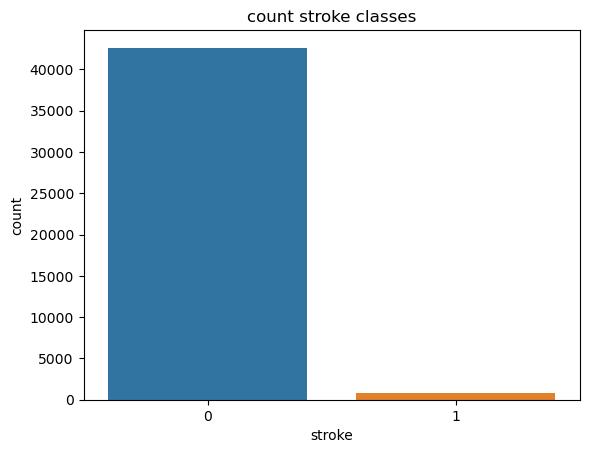

In [104]:
sns.countplot(x='stroke', data=data)
plt.title("count stroke classes")
plt.show()

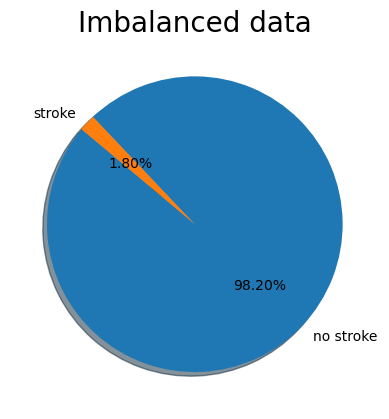

In [105]:
labels=['no stroke','stroke']
plt.pie(data['stroke'].value_counts(),labels=labels,
        autopct='%1.2f%%', shadow=True, startangle=140) 
plt.title("Imbalanced data",fontsize=20)  
plt.show()

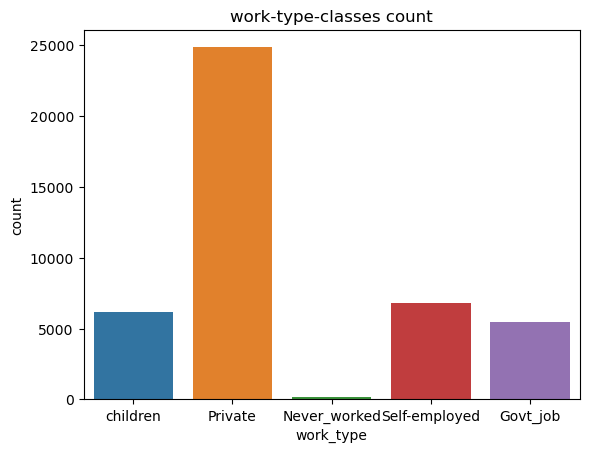

In [106]:
sns.countplot(x='work_type', data=data)
plt.title("work-type-classes count")
plt.show()

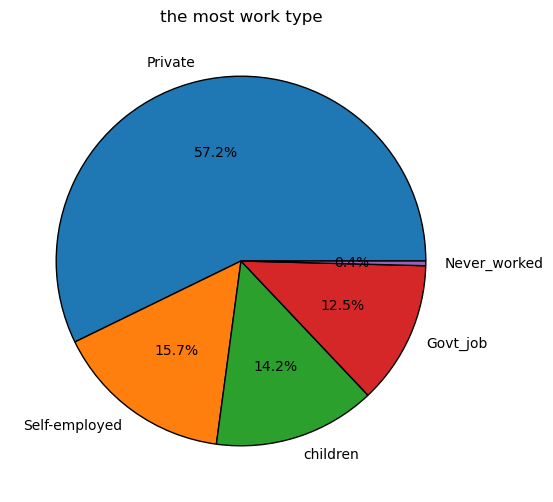

In [107]:
data['work_type'].value_counts()
x= data['work_type'].value_counts().index
y= data['work_type'].value_counts().values
plt.figure(figsize=(10,6))
plt.pie(y,labels=x,autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})     
plt.title('the most work type')
plt.show()

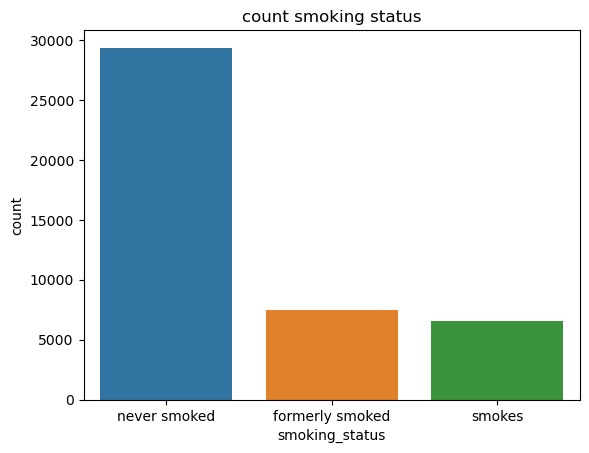

In [108]:
sns.countplot(x='smoking_status', data=data)
plt.title("count smoking status")
plt.show()

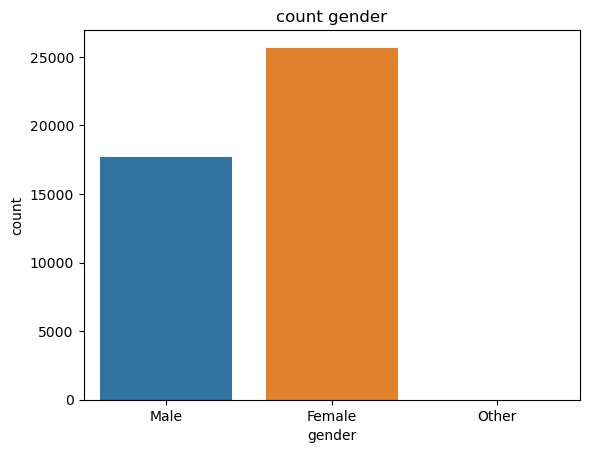

In [109]:
sns.countplot(x='gender', data=data)
plt.title("count gender")
plt.show()

In [110]:
# you can delete the 'other' gender 

other_gender = list(data[data['gender']=='Other'].index)
data.drop(index = other_gender, inplace=True)

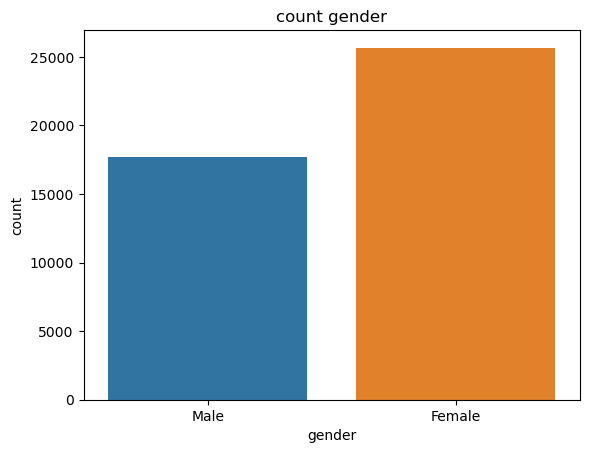

In [111]:
sns.countplot(x='gender', data=data)
plt.title("count gender")
plt.show()

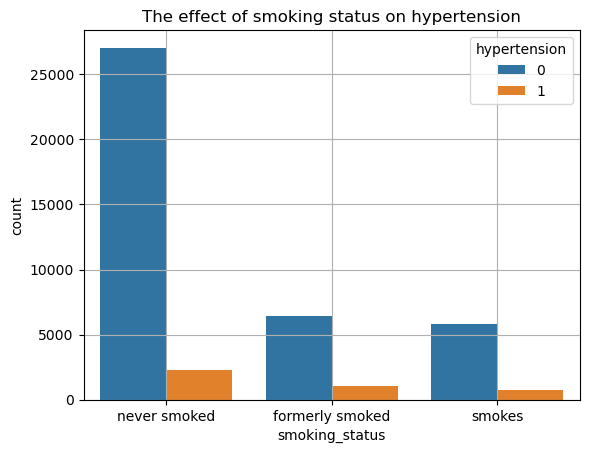

In [112]:
sns.countplot(x='smoking_status',hue='hypertension',data=data)
plt.title("The effect of smoking status on hypertension")
plt.grid(True)
plt.show()

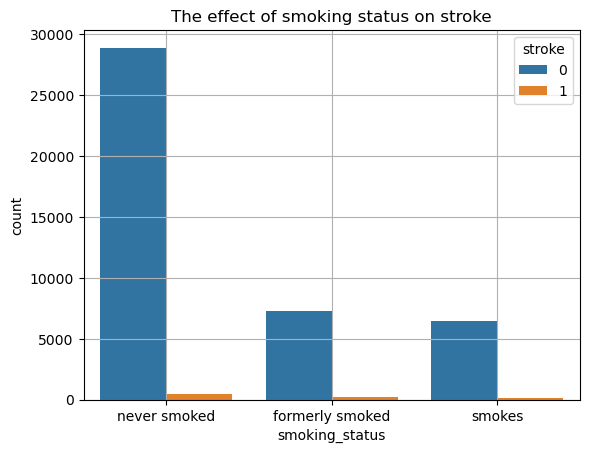

In [113]:
sns.countplot(x='smoking_status',hue='stroke',data=data)
plt.title('The effect of smoking status on stroke')
plt.grid(True)
plt.show()

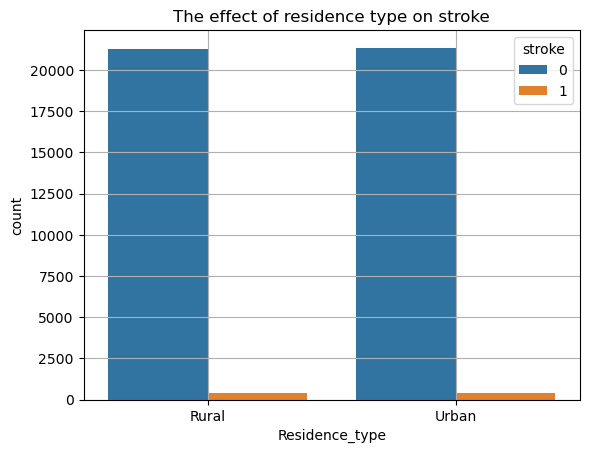

In [114]:
sns.countplot(x='Residence_type',hue='stroke',data=data)
plt.title('The effect of residence type on stroke')
plt.grid(True)
plt.show()

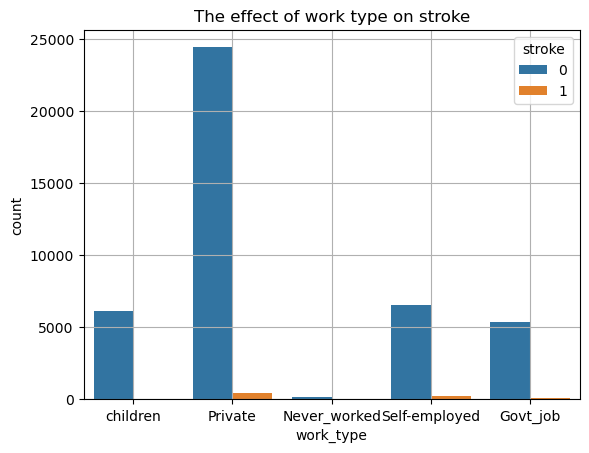

In [115]:
sns.countplot(x='work_type',hue='stroke',data=data)
plt.title('The effect of work type on stroke')
plt.grid(True)
plt.show()

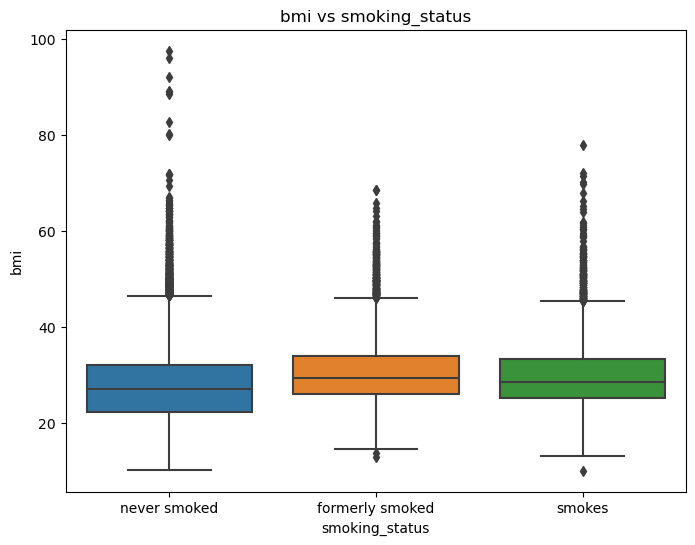

In [116]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_status', y='bmi', data=data)
plt.title('bmi vs smoking_status')
plt.show()

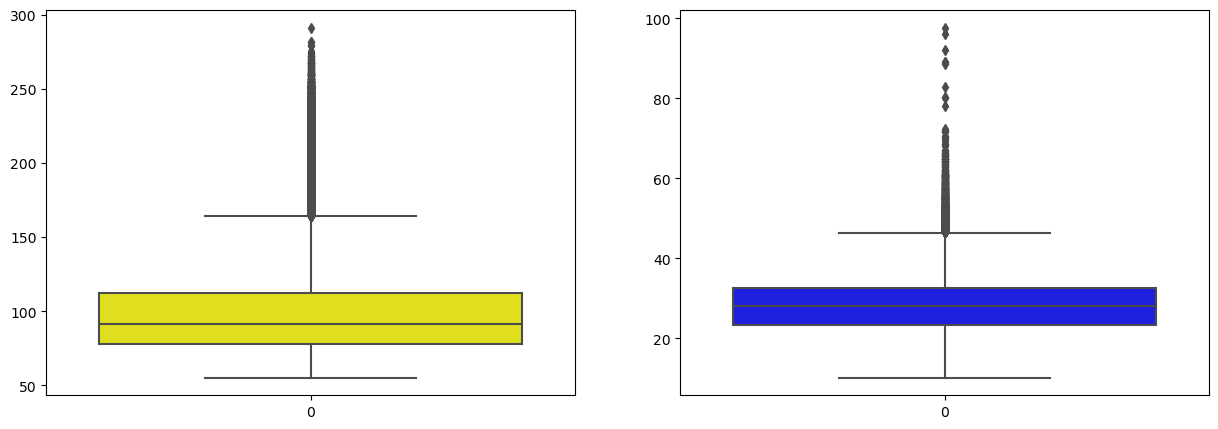

In [117]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data['avg_glucose_level'],color='yellow',ax=ax[0])
sns.boxplot(data['bmi'],color='blue',ax=ax[1])
plt.show()

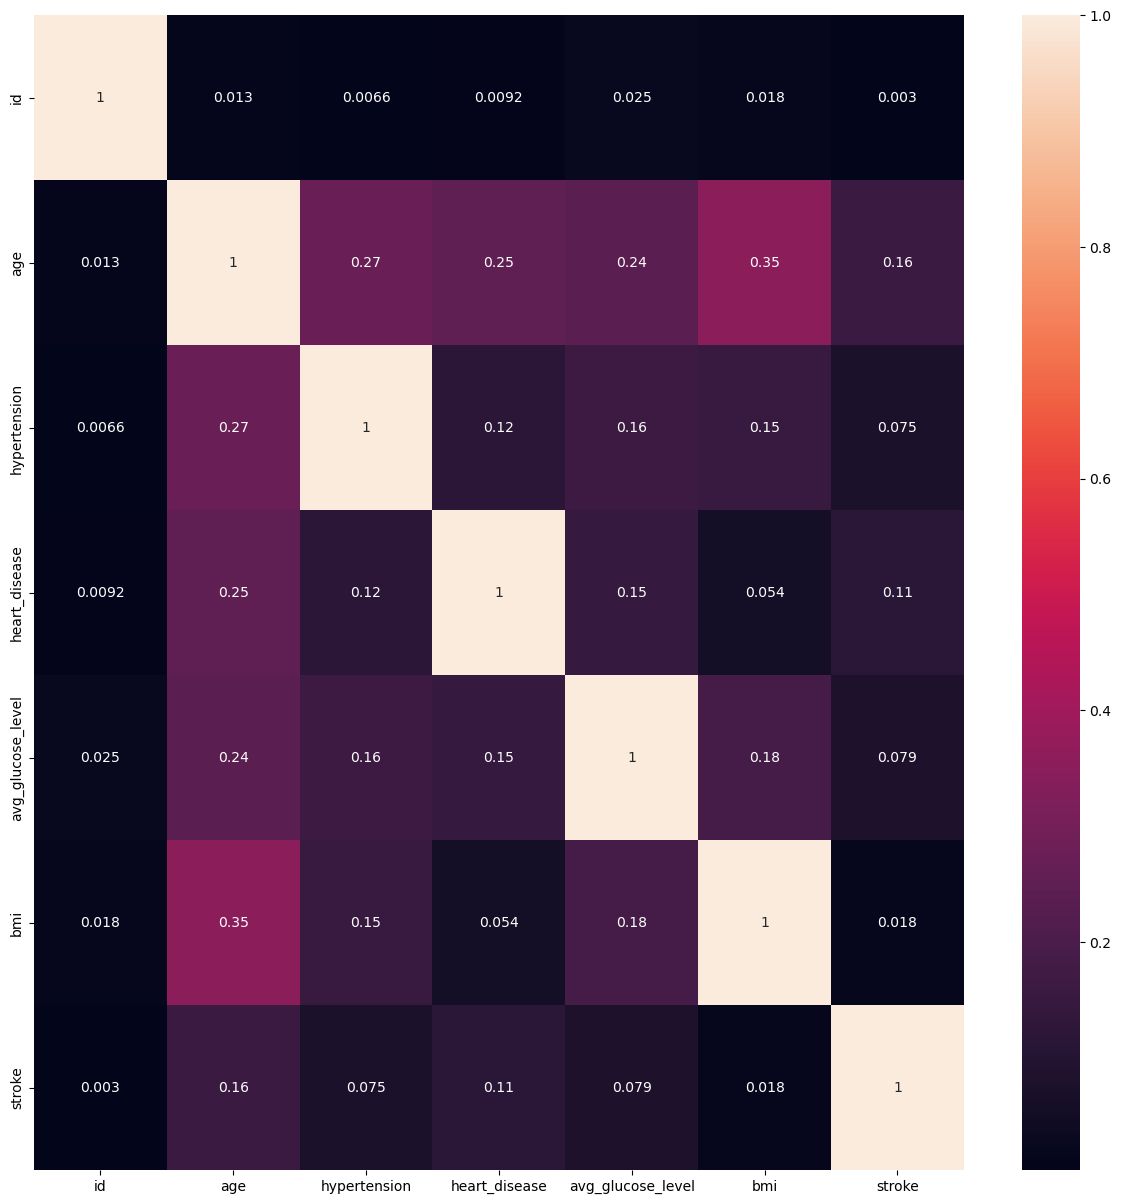

In [118]:
corr = data.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True);

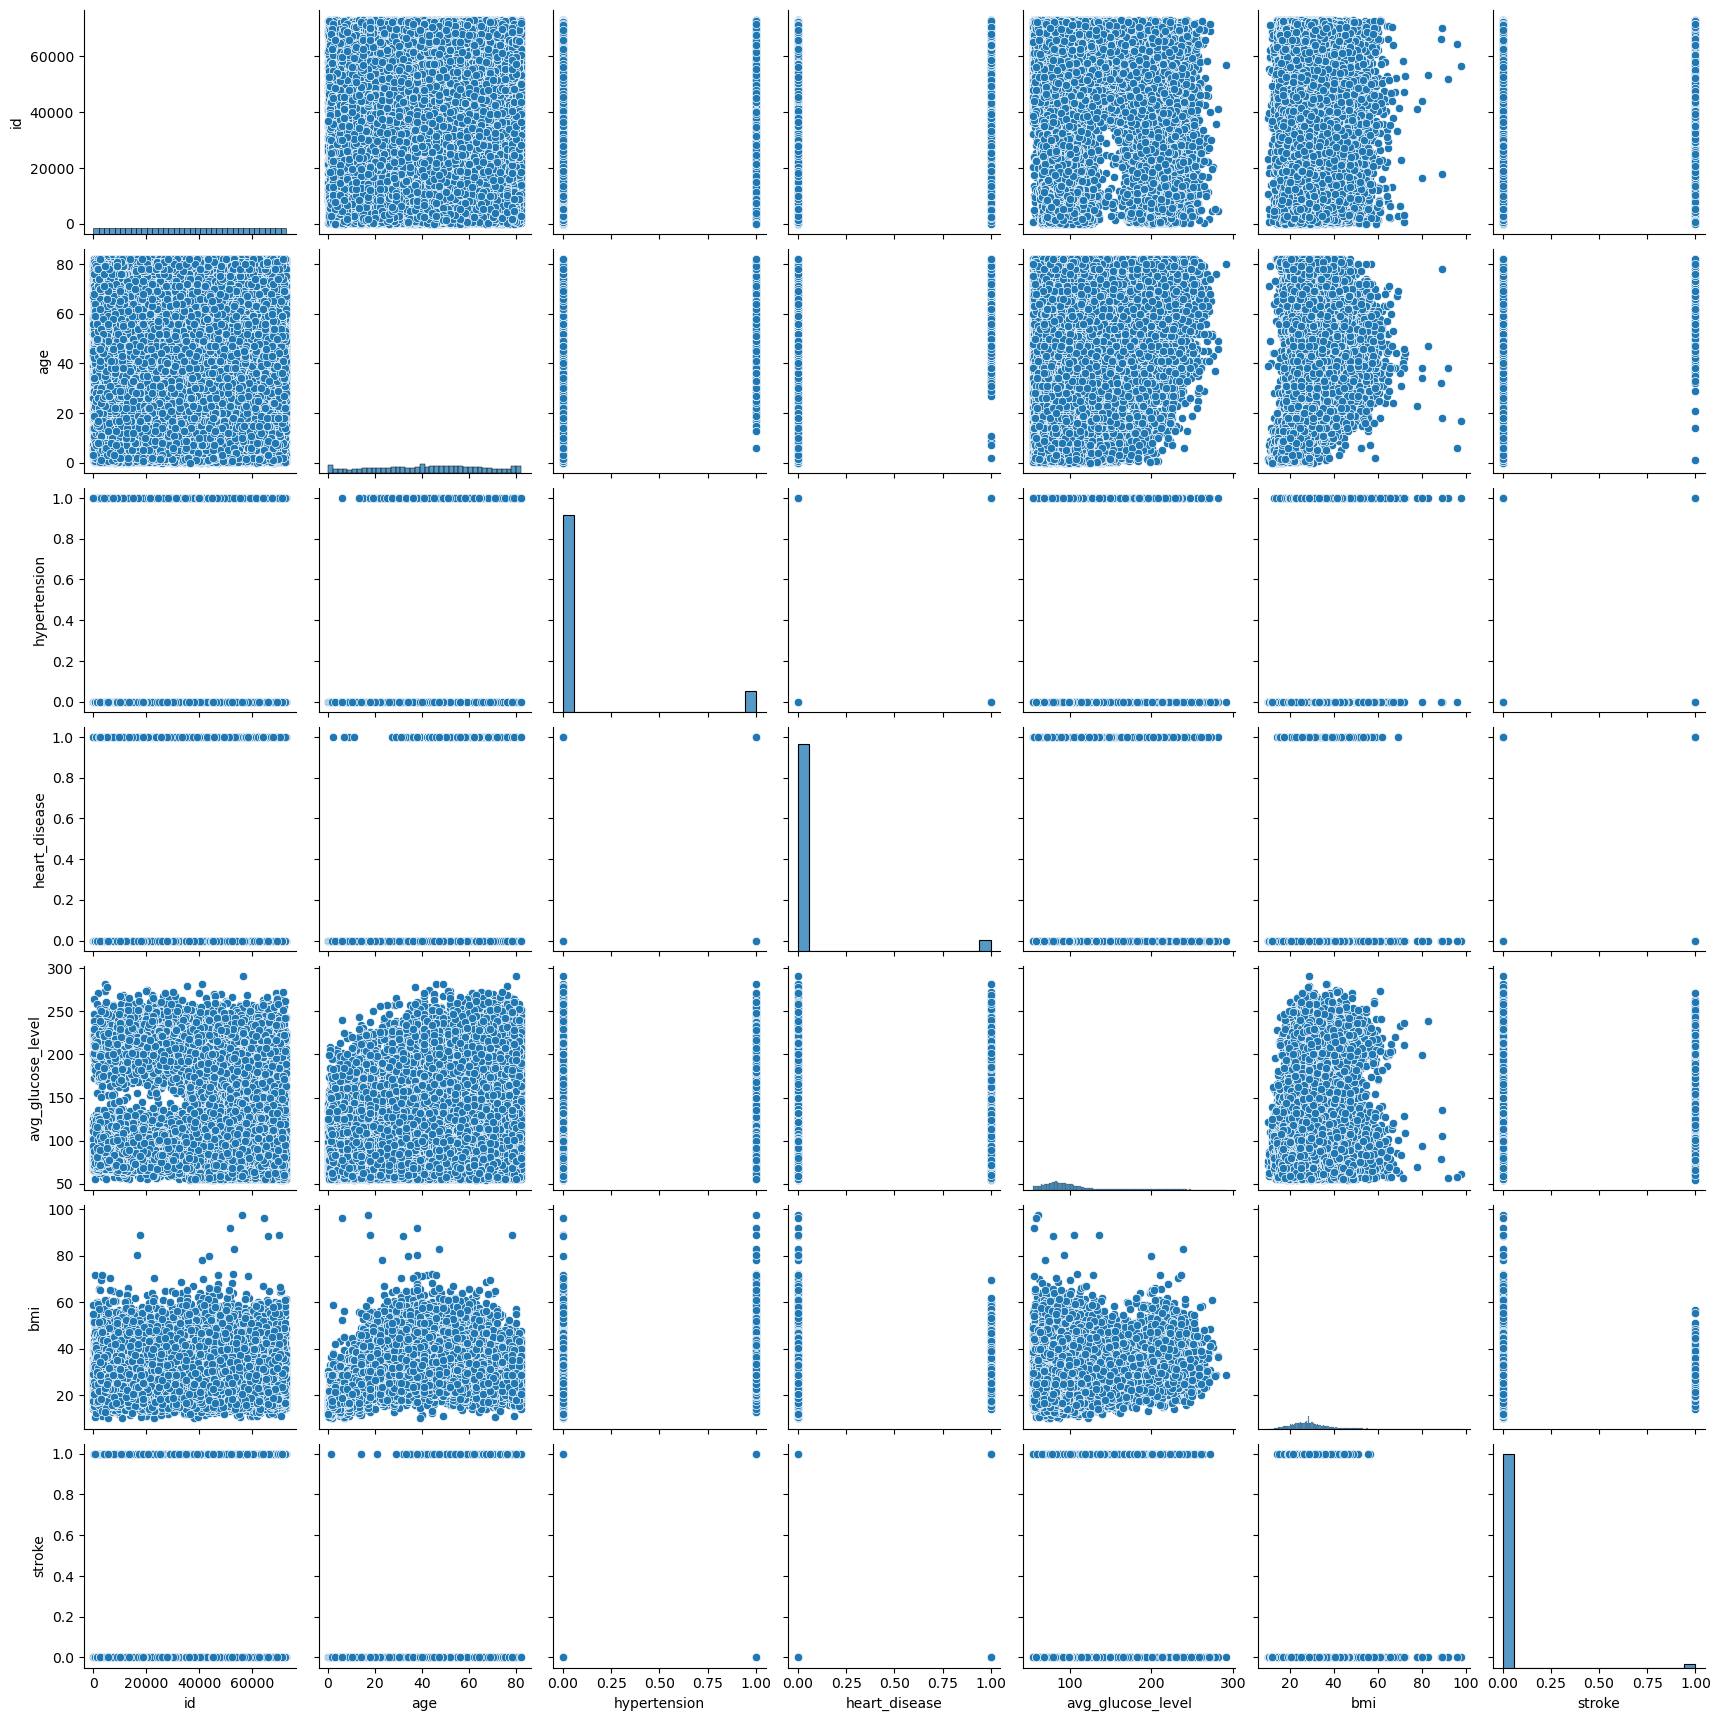

In [119]:
sns.pairplot(data)

In [120]:
# one hot encoding using pandas get_dummies() method 

obj_columns = data.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(data, columns=obj_columns, drop_first=True)
df_encoded.head(10)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,True,False,False,False,False,True,False,True,False
1,30468,58.0,1,0,87.96,39.2,0,True,True,False,True,False,False,True,True,False
2,16523,8.0,0,0,110.89,17.6,0,False,False,False,True,False,False,True,True,False
3,56543,70.0,0,0,69.04,35.9,0,False,True,False,True,False,False,False,False,False
4,46136,14.0,0,0,161.28,19.1,0,True,False,True,False,False,False,False,True,False
5,32257,47.0,0,0,210.95,50.1,0,False,True,False,True,False,False,True,True,False
6,52800,52.0,0,0,77.59,17.7,0,False,True,False,True,False,False,True,False,False
7,41413,75.0,0,1,243.53,27.0,0,False,True,False,False,True,False,False,True,False
8,15266,32.0,0,0,77.67,32.3,0,False,True,False,True,False,False,False,False,True
9,28674,74.0,1,0,205.84,54.6,0,False,True,False,False,True,False,True,True,False


In [121]:
df_encoded.shape

(43389, 16)

In [122]:
target=df_encoded['stroke']
label_data=df_encoded.drop(['stroke','id'],axis=1)

In [123]:
x=label_data
y=target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [124]:
cols = list(x.columns)
scaler = StandardScaler()
clean_data = scaler.fit_transform(x)
clean_data = pd.DataFrame(clean_data, columns=cols)
clean_data.sample(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
2430,0.434282,-0.321341,-0.223371,1.841212,-0.314875,-0.831018,0.743858,-0.064001,-1.156511,-0.430838,-0.406540,-1.002608,0.691942,-0.422081
15553,-0.986646,-0.321341,-0.223371,-0.584413,-0.668351,1.203344,-1.344343,-0.064001,0.864670,-0.430838,-0.406540,0.997399,0.691942,-0.422081
21772,1.322363,3.111963,-0.223371,3.324466,1.085936,-0.831018,0.743858,-0.064001,-1.156511,-0.430838,-0.406540,0.997399,0.691942,-0.422081
17119,-1.697110,-0.321341,-0.223371,-0.950182,-1.571678,1.203344,-1.344343,-0.064001,-1.156511,-0.430838,2.459784,-1.002608,0.691942,-0.422081
15694,-1.785918,-0.321341,-0.223371,-0.122621,-1.650228,-0.831018,-1.344343,-0.064001,-1.156511,-0.430838,2.459784,0.997399,0.691942,-0.422081
21276,-1.297474,-0.321341,-0.223371,-0.471690,-1.231294,-0.831018,-1.344343,-0.064001,-1.156511,-0.430838,2.459784,0.997399,0.691942,-0.422081
37189,-0.942242,-0.321341,-0.223371,-0.682523,0.064784,1.203344,-1.344343,-0.064001,0.864670,-0.430838,-0.406540,-1.002608,0.691942,-0.422081
26074,-0.942242,-0.321341,-0.223371,-0.376363,0.208793,-0.831018,0.743858,-0.064001,0.864670,-0.430838,-0.406540,-1.002608,-1.445207,-0.422081
20850,1.277959,-0.321341,4.476851,-0.186404,-0.197050,-0.831018,0.743858,-0.064001,0.864670,-0.430838,-0.406540,0.997399,-1.445207,2.369213
12680,-0.587010,-0.321341,-0.223371,-0.831429,-0.053041,1.203344,0.743858,-0.064001,0.864670,-0.430838,-0.406540,0.997399,0.691942,-0.422081


In [125]:
# mean = 0 , std = 1   nearly
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43389.0,-2.452321e-16,1.000012,-1.871174,-0.809030,0.079050,0.789514,1.766403
hypertension,43389.0,8.024291e-18,1.000012,-0.321341,-0.321341,-0.321341,-0.321341,3.111963
heart_disease,43389.0,-5.158472e-17,1.000012,-0.223371,-0.223371,-0.223371,-0.223371,4.476851
avg_glucose_level,43389.0,2.127256e-16,1.000012,-1.147794,-0.625002,-0.299359,0.175885,4.327142
bmi,43389.0,-2.793763e-16,1.000012,-2.422639,-0.681443,-0.066133,0.522993,9.032597
gender_Male,43389.0,-1.293712e-17,1.000012,-0.831018,-0.831018,-0.831018,1.203344,1.203344
ever_married_Yes,43389.0,-5.518747e-17,1.000012,-1.344343,-1.344343,0.743858,0.743858,0.743858
work_type_Never_worked,43389.0,-1.342840e-17,1.000012,-0.064001,-0.064001,-0.064001,-0.064001,15.624839
work_type_Private,43389.0,4.421548e-17,1.000012,-1.156511,-1.156511,0.864670,0.864670,0.864670
work_type_Self-employed,43389.0,-4.650813e-17,1.000012,-0.430838,-0.430838,-0.430838,-0.430838,2.321058


<Axes: xlabel='stroke', ylabel='Density'>

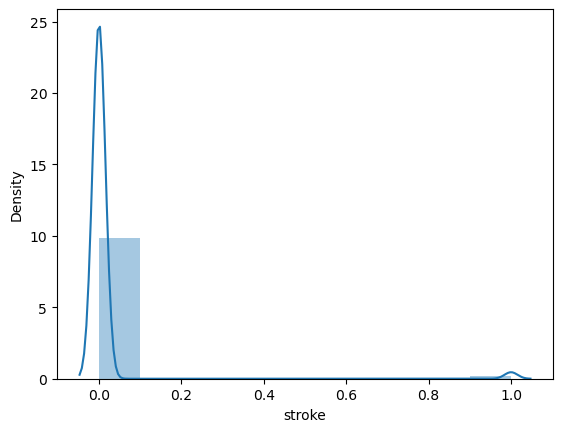

In [127]:
sns.distplot(y, bins=10)

In [128]:
# deal with the imbalance of the data
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y_smote.value_counts())

stroke
0    42606
1    42606
Name: count, dtype: int64


<Axes: xlabel='stroke', ylabel='Density'>

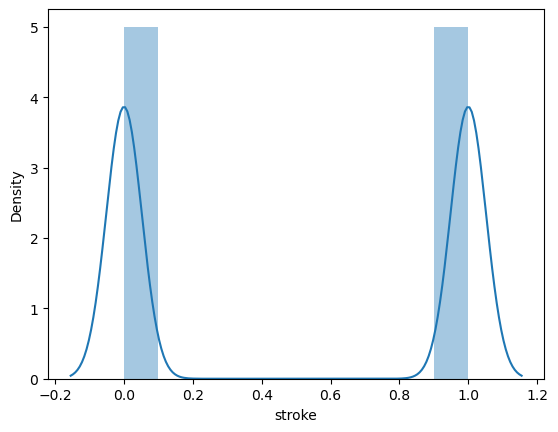

In [129]:
sns.distplot(y_smote, bins=10)

In [132]:
# std & mean looks like needing to be standardized again
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43389.0,42.219747,22.520750,0.08,24.00,44.00,60.00,82.00
hypertension,43389.0,0.093595,0.291268,0.00,0.00,0.00,0.00,1.00
heart_disease,43389.0,0.047524,0.212758,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43389.0,104.486760,43.115157,55.00,77.54,91.58,112.07,291.05
bmi,43389.0,28.605152,7.638516,10.10,23.40,28.10,32.60,97.60


In [135]:
# we should do scaling again for getting the best performance 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_smote)
x_scaled_df = pd.DataFrame(x_scaled, columns=list(x.columns))
x_scaled_df.sample(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
81579,0.754418,-0.299003,-0.235651,1.589717,2.085795,-1.09884,0.479991,-0.045623,0.685535,-0.709965,-0.281849,0.775479,0.621752,1.881435
5621,-2.377842,-0.299003,-0.235651,-0.372671,-1.480887,0.91005,-2.083371,-0.045623,-1.458715,-0.709965,3.547994,-1.289525,0.621752,-0.531509
8452,-0.002133,-0.299003,-0.235651,-0.322189,0.145983,0.91005,0.479991,-0.045623,-1.458715,1.408519,-0.281849,0.775479,0.621752,-0.531509
68164,0.910653,-0.299003,-0.235651,0.245761,-0.073771,-1.09884,0.479991,-0.045623,0.685535,-0.709965,-0.281849,0.775479,0.621752,1.881435
38632,-1.033101,-0.299003,-0.235651,-0.636719,-0.621408,-1.09884,0.479991,-0.045623,0.685535,-0.709965,-0.281849,0.775479,-1.608358,-0.531509
65144,0.472156,-0.299003,-0.235651,-0.217708,-0.180554,0.91005,0.479991,-0.045623,0.685535,-0.709965,-0.281849,0.775479,0.621752,1.881435
51146,0.918990,-0.299003,-0.235651,-0.426119,-0.177950,-1.09884,0.479991,-0.045623,0.685535,-0.709965,-0.281849,0.775479,0.621752,-0.531509
55480,0.993257,-0.299003,-0.235651,-0.136447,0.533327,-1.09884,0.479991,-0.045623,0.685535,-0.709965,-0.281849,0.775479,-1.608358,-0.531509
34208,-1.795121,-0.299003,-0.235651,-0.824948,-0.145625,0.91005,-2.083371,-0.045623,-1.458715,-0.709965,-0.281849,-1.289525,-1.608358,1.881435
16222,0.939186,-0.299003,-0.235651,-0.632590,-1.404147,-1.09884,-2.083371,-0.045623,-1.458715,1.408519,-0.281849,0.775479,0.621752,-0.531509


In [136]:
# split again
x_train,x_test,y_train,y_test = train_test_split(x_scaled ,y_smote ,test_size=0.2, random_state=21)

In [138]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights

array([ 0.50918885, 27.70689655])

In [139]:
class_labels = [0, 1]  
# Create class weights dictionary
class_weights_as_dict = {class_label: weight for class_label, weight in zip(class_labels, class_weights)}
class_weights_as_dict

{0: 0.5091888466413181, 1: 27.70689655172414}

In [140]:
def classify_data(classifier, X_train, y_train, X_test, y_test):
    """
    Classify the data using the specified classifier.

    Parameters:
        classifier: Machine learning classifier object.
        X_train: Features of the training set.
        y_train: Labels of the training set.
        X_test: Features of the test set.
        y_test: Labels of the test set.


    Print:
        some metrics like acc, roc_auc, and f1_score and more
        classificatoin_report, confusion_matrix
    """
    
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    
    
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    print(confusion_matrix(y_test, y_pred))
    print('---------------------------------------')
    print(classification_report(y_test, y_pred))
    print('---------------------------------------')
    print("Accuracy:", accuracy)
    print('---------------------------------------')
    print("Error Rate:", error_rate)
    print('---------------------------------------')
    print("Precision:", precision)
    print('---------------------------------------')
    print("Recall:", recall)
    print('---------------------------------------')
    print("F1-Measure:", f1)
    print('---------------------------------------')
    print("ROC AUC:", roc_auc)
    print('---------------------------------------')
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [148]:
# save the classifiers in a map to loop over them 

classifiers_dict = {'Logistic Regression' : LogisticRegression(class_weight=class_weights_as_dict)
                    , 'XGBoost' : XGBClassifier(class_weight=class_weights_as_dict)
                    , 'Support Vector Machine' : SVC(class_weight=class_weights_as_dict)
                    , 'Random Forest' : RandomForestClassifier(class_weight=class_weights_as_dict)
                    , 'KNN' : KNeighborsClassifier()}

----------------------------Logistic Regression----------------------------
[[3260 5246]
 [  17 8520]]
---------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.38      0.55      8506
           1       0.62      1.00      0.76      8537

    accuracy                           0.69     17043
   macro avg       0.81      0.69      0.66     17043
weighted avg       0.81      0.69      0.66     17043

---------------------------------------
Accuracy: 0.6911928651059086
---------------------------------------
Error Rate: 0.3088071348940914
---------------------------------------
Precision: 0.6189161702745896
---------------------------------------
Recall: 0.9980086681504041
---------------------------------------
F1-Measure: 0.7640227772048603
---------------------------------------
ROC AUC: 0.690633772118936
---------------------------------------


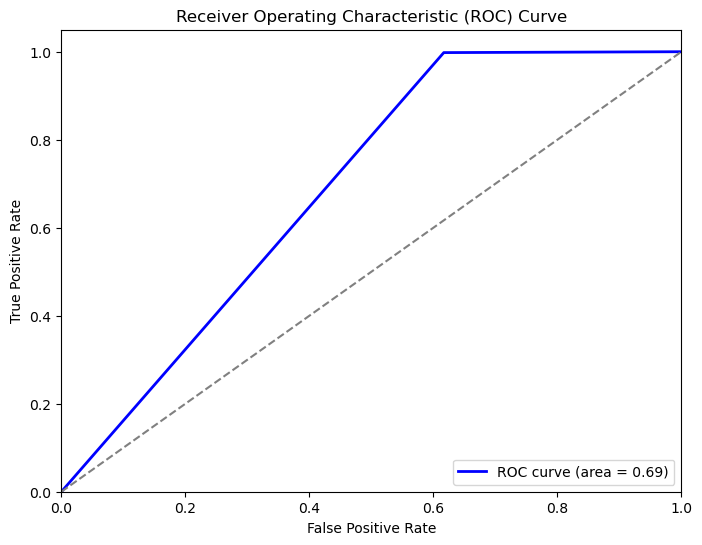

_______________________________________________________________________
                                                                        
----------------------------XGBoost----------------------------
[[8161  345]
 [ 302 8235]]
---------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8506
           1       0.96      0.96      0.96      8537

    accuracy                           0.96     17043
   macro avg       0.96      0.96      0.96     17043
weighted avg       0.96      0.96      0.96     17043

---------------------------------------
Accuracy: 0.96203720002347
---------------------------------------
Error Rate: 0.03796279997652996
---------------------------------------
Precision: 0.9597902097902098
---------------------------------------
Recall: 0.9646245753777674
---------------------------------------
F1-Measure: 0.9622013203248233
---------------------------------------
ROC AUC: 0

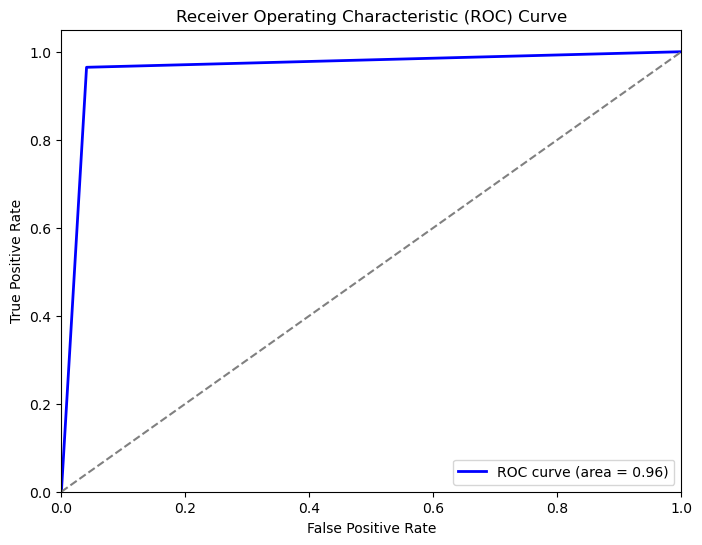

_______________________________________________________________________
                                                                        
----------------------------Support Vector Machine----------------------------
[[4252 4254]
 [   6 8531]]
---------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      8506
           1       0.67      1.00      0.80      8537

    accuracy                           0.75     17043
   macro avg       0.83      0.75      0.73     17043
weighted avg       0.83      0.75      0.73     17043

---------------------------------------
Accuracy: 0.7500440063369125
---------------------------------------
Error Rate: 0.24995599366308752
---------------------------------------
Precision: 0.667266327727806
---------------------------------------
Recall: 0.9992971769942602
---------------------------------------
F1-Measure: 0.8002063596285527
----------------------------------

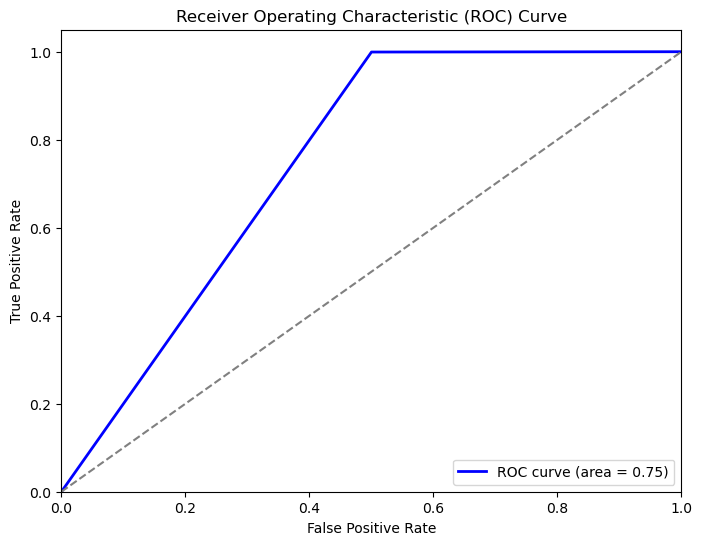

_______________________________________________________________________
                                                                        
----------------------------Random Forest----------------------------
[[8291  215]
 [ 167 8370]]
---------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8506
           1       0.97      0.98      0.98      8537

    accuracy                           0.98     17043
   macro avg       0.98      0.98      0.98     17043
weighted avg       0.98      0.98      0.98     17043

---------------------------------------
Accuracy: 0.9775861057325588
---------------------------------------
Error Rate: 0.022413894267441226
---------------------------------------
Precision: 0.9749563191613279
---------------------------------------
Recall: 0.9804380930069111
---------------------------------------
F1-Measure: 0.9776895222520734
---------------------------------------
R

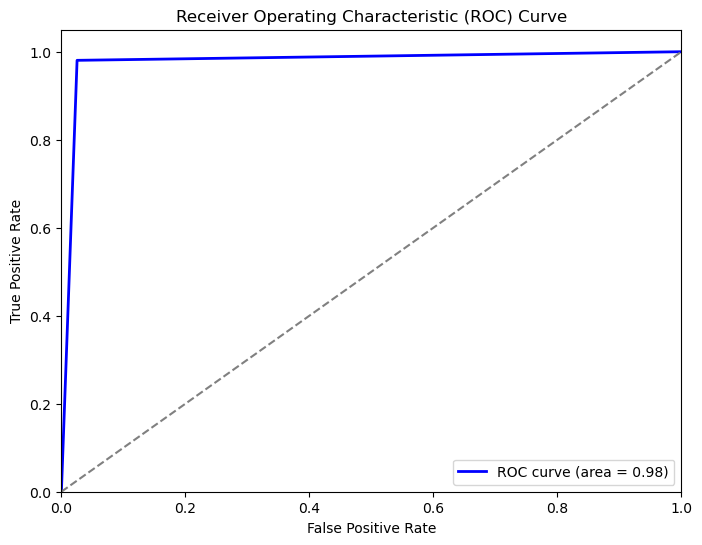

_______________________________________________________________________
                                                                        
----------------------------KNN----------------------------
[[7729  777]
 [ 131 8406]]
---------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8506
           1       0.92      0.98      0.95      8537

    accuracy                           0.95     17043
   macro avg       0.95      0.95      0.95     17043
weighted avg       0.95      0.95      0.95     17043

---------------------------------------
Accuracy: 0.9467229947779147
---------------------------------------
Error Rate: 0.05327700522208534
---------------------------------------
Precision: 0.9153871283894153
---------------------------------------
Recall: 0.9846550310413494
---------------------------------------
F1-Measure: 0.9487584650112867
---------------------------------------
ROC AUC: 0.9

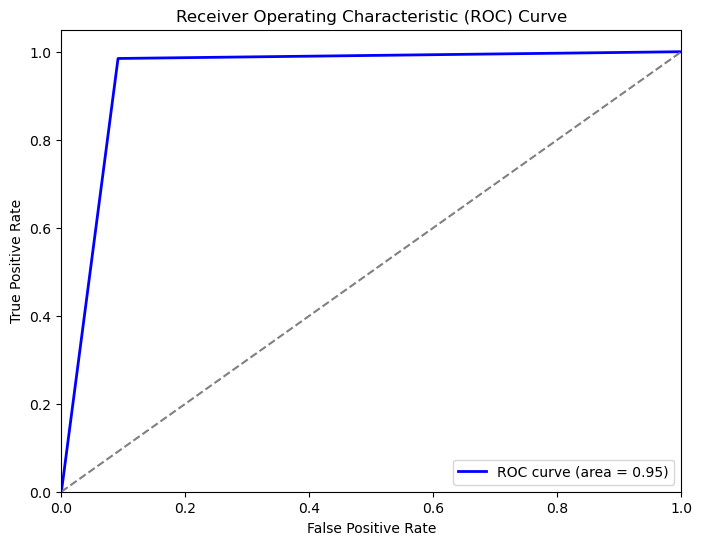

_______________________________________________________________________
                                                                        


In [149]:
# loop the function over the dict we made 
for classifier_name, classifier in classifiers_dict.items():
    print(f'----------------------------{classifier_name}----------------------------')
    classify_data(classifier, x_train, y_train, x_test, y_test)
    print('_______________________________________________________________________')
    print('                                                                        ')
    

## models chosen for doing hyperparameter tuning : [KNN, RandomForest, XGBoost]